In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata = sc.read_h5ad('h5ad/ln_integrated.h5ad')
adata

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


AnnData object with n_obs × n_vars = 33843 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

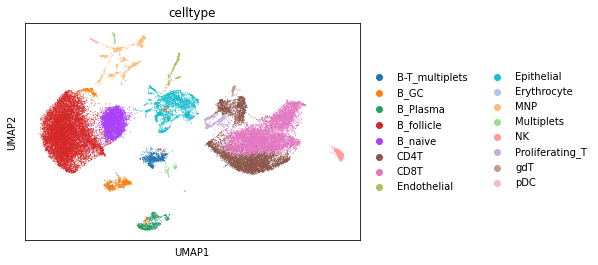

In [2]:
sc.pl.umap(adata, color = 'celltype')

## CD4T

In [3]:
bdata = adata[adata.obs['celltype'].isin(['CD4T'])].copy()
bdata

AnnData object with n_obs × n_vars = 5594 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

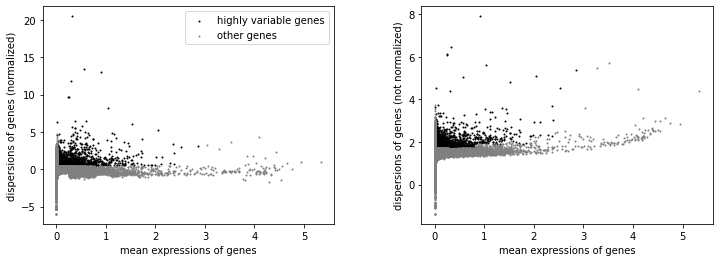

In [4]:
### recompute umap
bdata = bdata.raw.to_adata()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

In [5]:
bdata.raw = bdata

In [6]:
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 5594 × 2055
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [7]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.regress_out(bdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

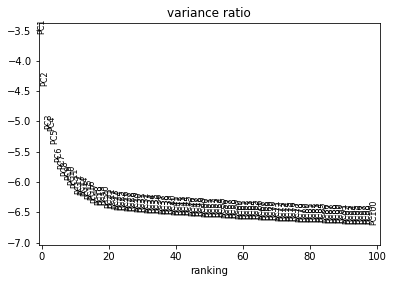

In [8]:
sc.tl.pca(bdata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=100)

In [9]:
sc.external.pp.harmony_integrate(bdata, key = 'sequencing_batch', adjusted_basis='X_pca')

2022-07-22 12:37:57,631 - harmonypy - INFO - Iteration 1 of 10
2022-07-22 12:38:04,617 - harmonypy - INFO - Iteration 2 of 10
2022-07-22 12:38:10,424 - harmonypy - INFO - Iteration 3 of 10
2022-07-22 12:38:16,316 - harmonypy - INFO - Iteration 4 of 10
2022-07-22 12:38:21,720 - harmonypy - INFO - Iteration 5 of 10
2022-07-22 12:38:27,033 - harmonypy - INFO - Converged after 5 iterations


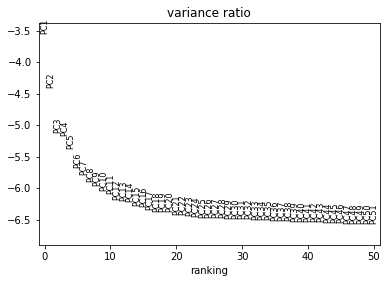

In [10]:
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=50)

In [11]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs = 20)
sc.tl.umap(bdata, min_dist=.3)

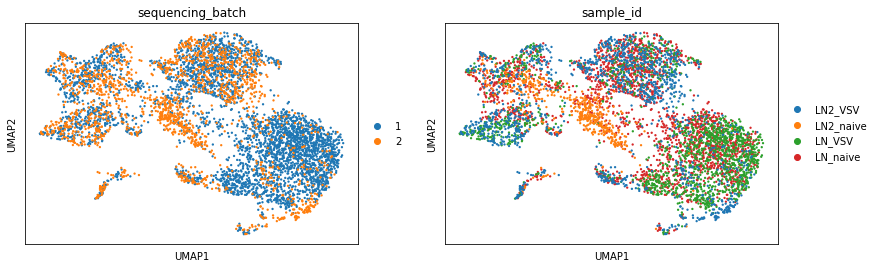

In [12]:
sc.pl.umap(bdata, color=['sequencing_batch', 'sample_id'])

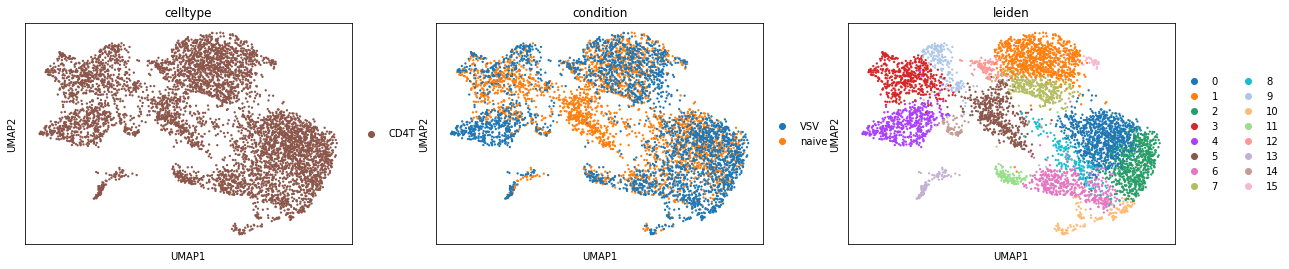

In [13]:
sc.tl.leiden(bdata)
sc.pl.umap(bdata, color=['celltype', 'condition', 'leiden'])

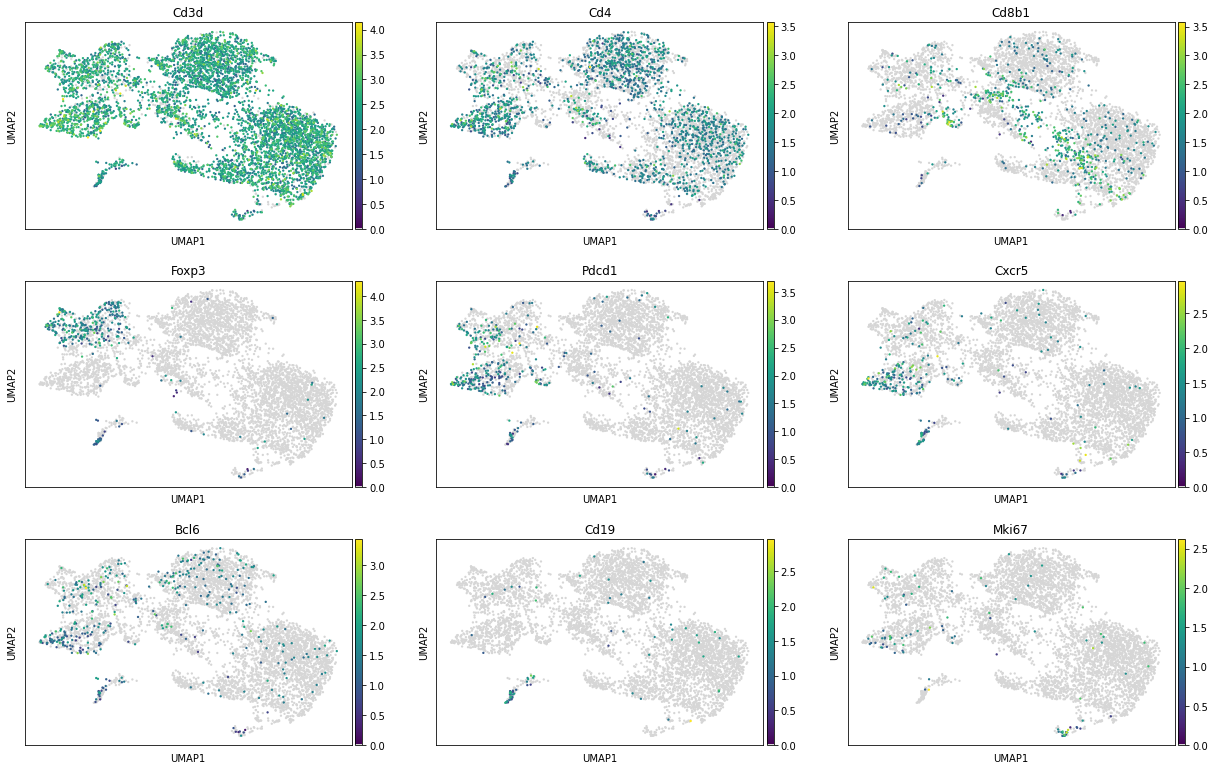

In [14]:
sc.pl.umap(bdata, color = ['Cd3d', 'Cd4', 'Cd8b1', 'Foxp3', 'Pdcd1', 'Cxcr5', 'Bcl6', 'Cd19', 'Mki67'], color_map = tools.cmp(), ncols = 3)

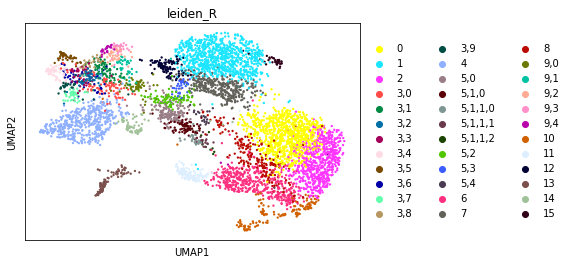

In [15]:
sc.tl.leiden(bdata, restrict_to = ('leiden', ['5']), resolution = .5)
sc.tl.leiden(bdata, restrict_to = ('leiden_R', ['5,1']), resolution = .5)
sc.tl.leiden(bdata, restrict_to = ('leiden_R', ['5,1,1']), resolution = .5)
sc.tl.leiden(bdata, restrict_to = ('leiden_R', ['3']), resolution = 1)
sc.tl.leiden(bdata, restrict_to = ('leiden_R', ['9']), resolution = .8)
sc.pl.umap(bdata, color=['leiden_R'])

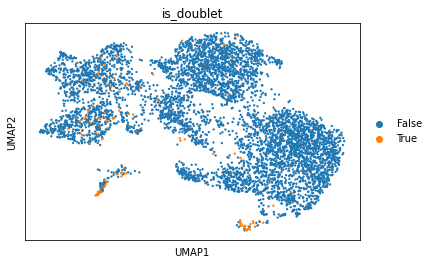

In [16]:
sc.pl.umap(bdata, color=['is_doublet'])

In [17]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_R', method = 'wilcoxon')

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399: Pe

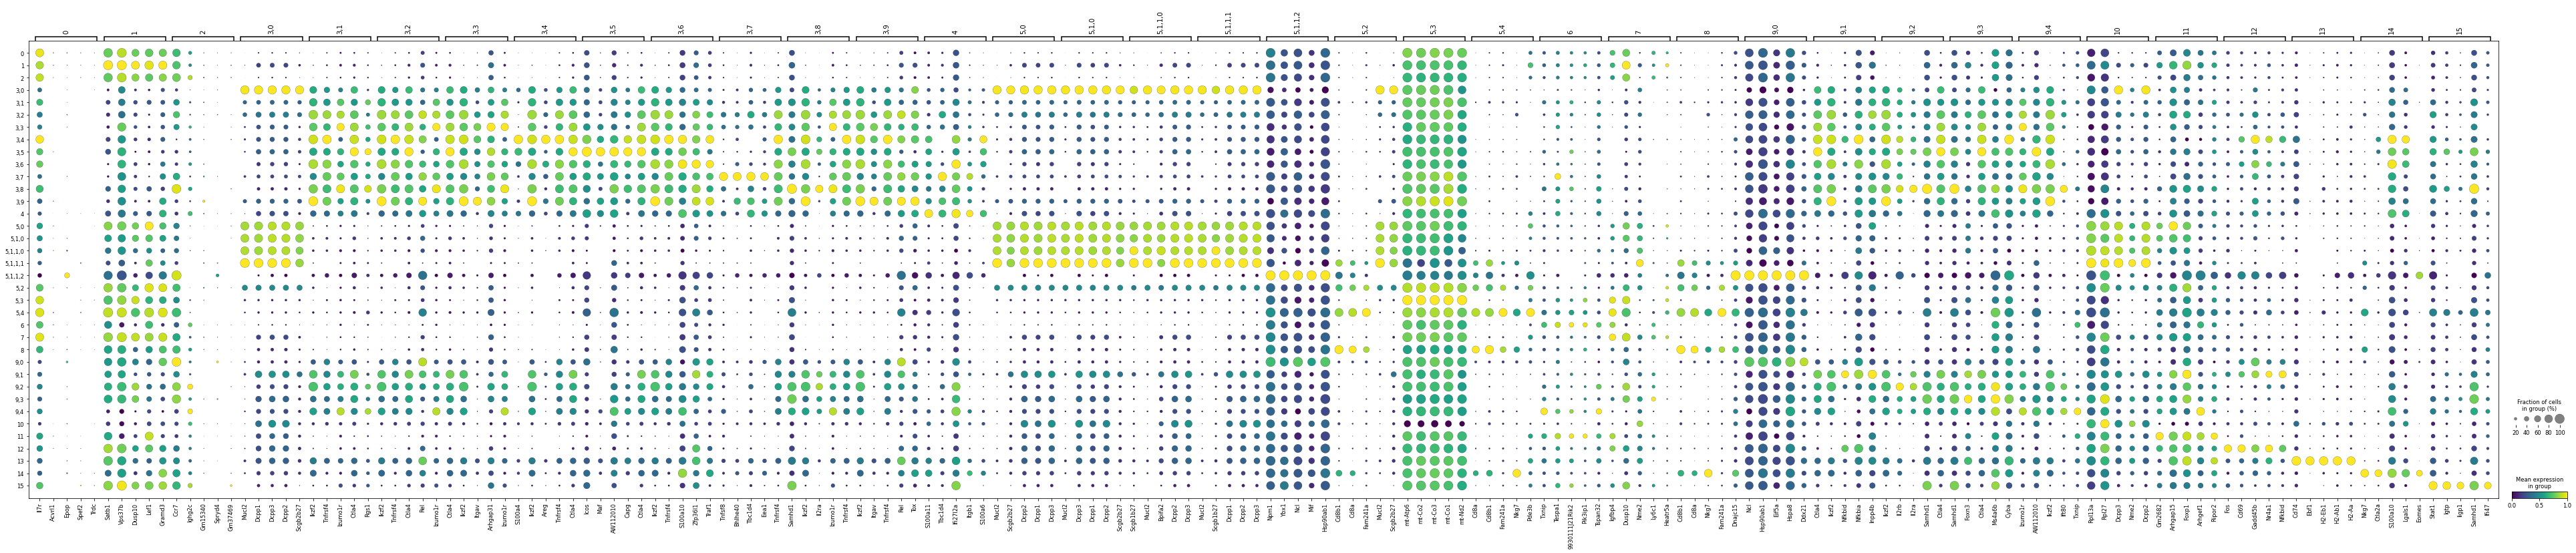

In [18]:
sc.pl.rank_genes_groups_dotplot(bdata, n_genes= 5, 
                                min_logfoldchange = 1, 
                                standard_scale = 'var', 
                                color_map = 'viridis', dendrogram = False)

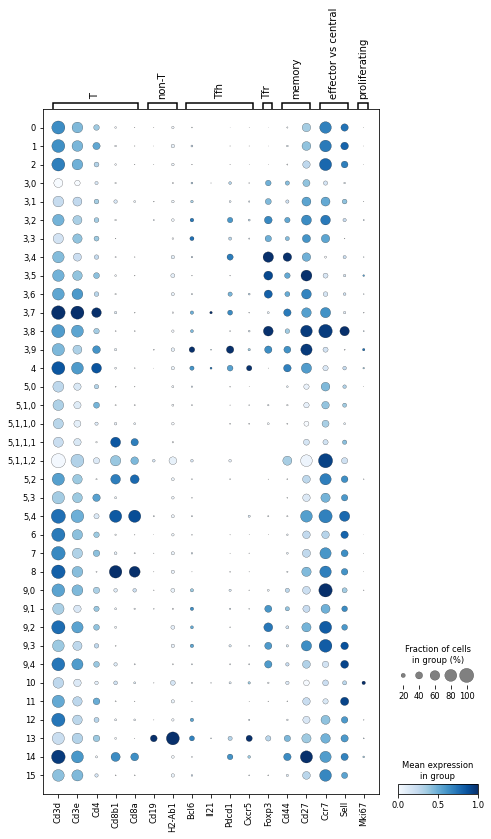

In [19]:
sc.pl.dotplot(bdata, {
    'T':['Cd3d', 'Cd3e', 'Cd4', 'Cd8b1', 'Cd8a'],
    'non-T':['Cd19', 'H2-Ab1'],
    'Tfh':['Bcl6', 'Il21', 'Pdcd1', 'Cxcr5'],
    'Tfr':['Foxp3'],
    'memory':['Cd44', 'Cd27'],
    'effector vs central':['Ccr7', 'Sell'],
    'proliferating':['Mki67']
},
              groupby = 'leiden_R',
              standard_scale = 'var', 
              color_map = 'Blues',)

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


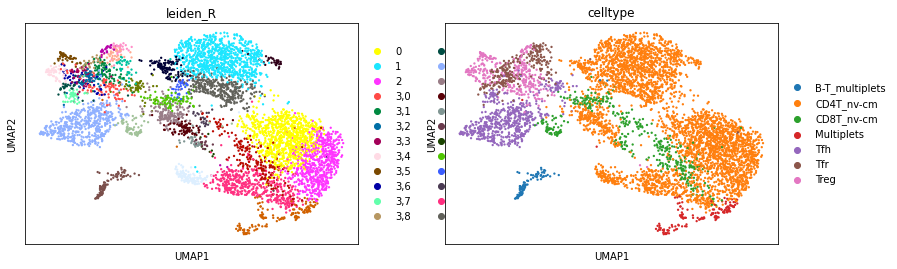

In [20]:
new_dict ={'0':'CD4T_nv-cm',
'1':'CD4T_nv-cm',
'2':'CD4T_nv-cm',
'3,0':'Treg',
'3,1':'Treg',
'3,2':'Tfr',
'3,3':'Tfr',
'3,4':'Treg',
'3,5':'Treg',
'3,6':'Treg',
'3,7':'Tfh',
'3,8':'Tfr',
'3,9':'Tfr',
'4':'Tfh',
'5,0':'CD4T_nv-cm',
'5,1,0':'CD4T_nv-cm',
'5,1,1,0':'CD4T_nv-cm',
'5,1,1,1':'CD8T_nv-cm',
'5,1,1,2':'CD8T_nv-cm',
'5,2':'CD8T_nv-cm',
'5,3':'CD4T_nv-cm',
'5,4':'CD8T_nv-cm',
'5,5':'CD4T_nv-cm',
'6':'CD4T_nv-cm',
'7':'CD4T_nv-cm',
'8':'CD8T_nv-cm',
'9,0':'Tfh',
'9,1':'Tfr',
'9,2':'Tfr',
'9,3':'Tfr',
'9,4':'Treg',
'10':'Multiplets',
'11':'CD4T_nv-cm',
'12':'CD4T_nv-cm',
'13':'B-T_multiplets',
'14':'CD8T_nv-cm',
'15':'CD4T_nv-cm',
}
bdata.obs['celltype'] = [new_dict[x] for x in bdata.obs['leiden_R']]
sc.pl.umap(bdata, color = ['leiden_R', 'celltype'])

In [21]:
adata.obs['celltype'] = adata.obs['celltype'].astype(str)
adata.obs['celltype'].update(bdata.obs['celltype'])

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


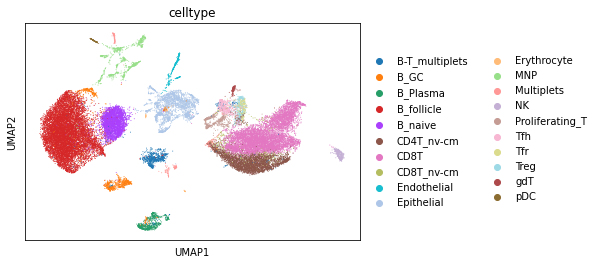

In [22]:
sc.pl.umap(adata, color = 'celltype')

## CD8T

In [23]:
bdata = adata[adata.obs['celltype'].isin(['CD8T', 'CD8T_nv-cm'])].copy()
bdata

AnnData object with n_obs × n_vars = 7683 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

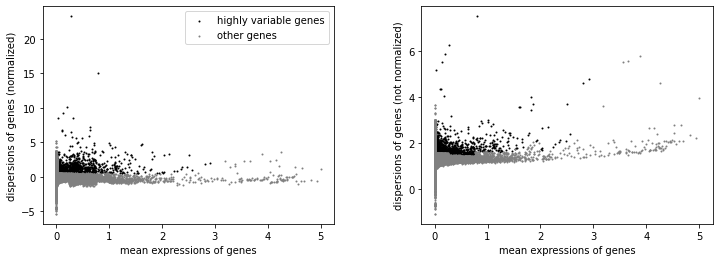

In [24]:
### recompute umap
bdata = bdata.raw.to_adata()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

In [25]:
bdata.raw = bdata

In [26]:
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 7683 × 1780
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [27]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.regress_out(bdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

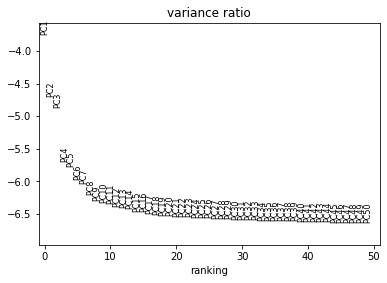

In [28]:
sc.tl.pca(bdata, svd_solver='arpack', n_comps=50)
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=50)

In [29]:
sc.external.pp.harmony_integrate(bdata, key = 'sequencing_batch', adjusted_basis='X_pca')

2022-07-22 12:42:03,615 - harmonypy - INFO - Iteration 1 of 10
2022-07-22 12:42:08,116 - harmonypy - INFO - Iteration 2 of 10
2022-07-22 12:42:11,816 - harmonypy - INFO - Converged after 2 iterations


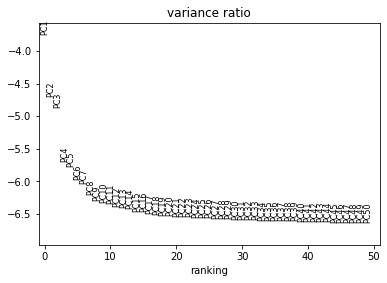

In [30]:
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=50)

In [31]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs = 15)
sc.tl.umap(bdata, min_dist=.3)

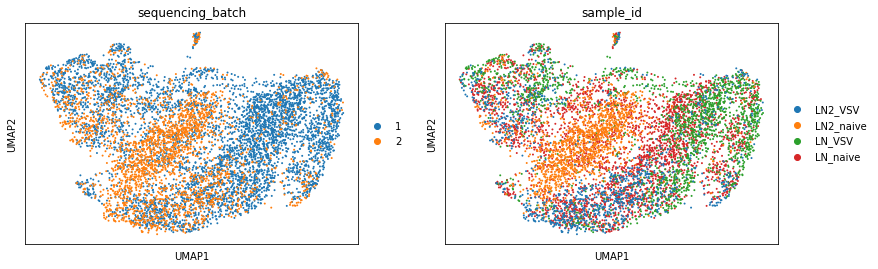

In [32]:
sc.pl.umap(bdata, color=['sequencing_batch', 'sample_id'])

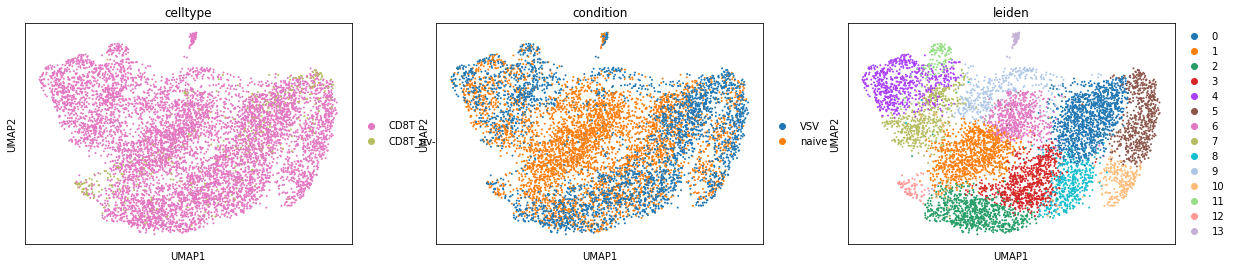

In [33]:
sc.tl.leiden(bdata)
sc.pl.umap(bdata, color=['celltype', 'condition', 'leiden'])

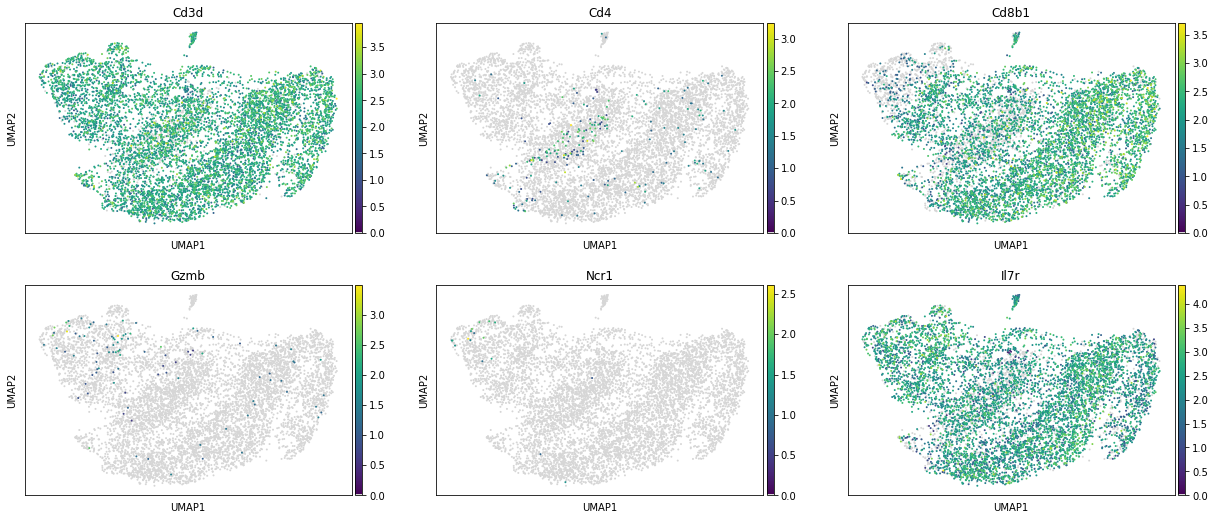

In [34]:
sc.pl.umap(bdata, color = ['Cd3d', 'Cd4', 'Cd8b1', 'Gzmb', 'Ncr1', 'Il7r'], color_map = tools.cmp(), ncols = 3)

In [35]:
# sc.tl.leiden(bdata, restrict_to = ('leiden', ['2']), resolution = .5)
# sc.tl.leiden(bdata, restrict_to = ('leiden_R', ['8']), resolution = .5)
# sc.pl.umap(bdata, color=['leiden_R'])

In [36]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden', method = 'wilcoxon')

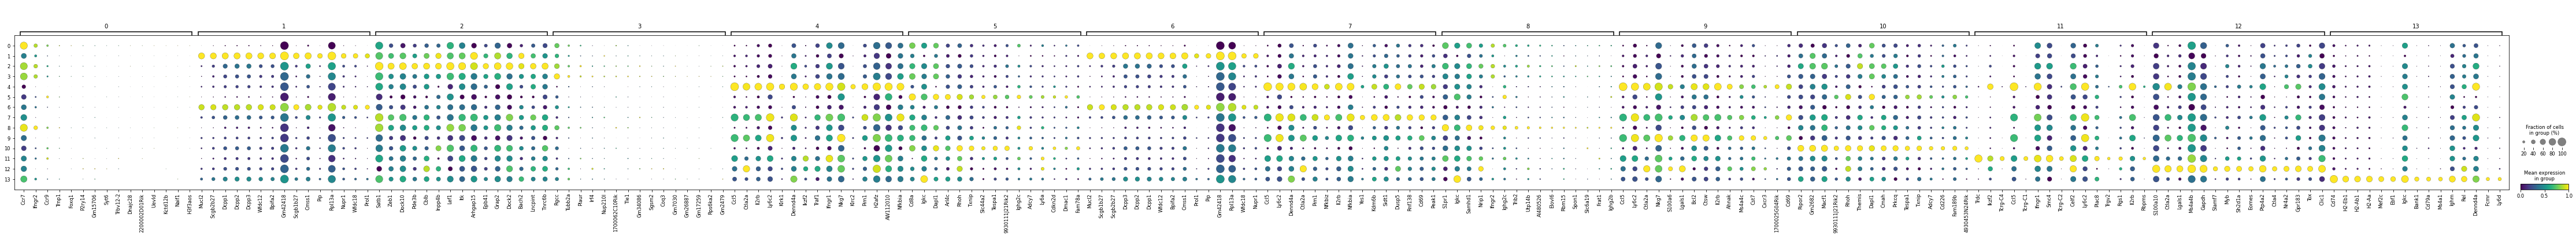

In [37]:
sc.pl.rank_genes_groups_dotplot(bdata, n_genes= 15, 
                                min_logfoldchange = 1, 
                                standard_scale = 'var', 
                                color_map = 'viridis', dendrogram = False)

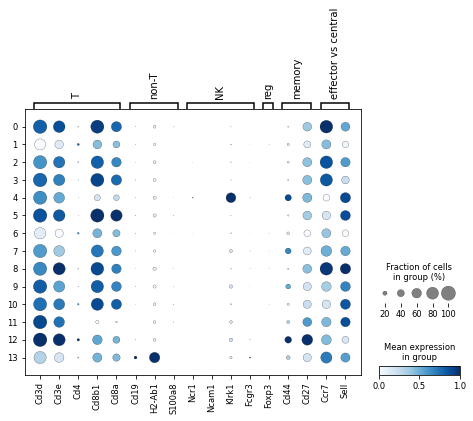

In [38]:
sc.pl.dotplot(bdata, {
    'T':['Cd3d', 'Cd3e', 'Cd4', 'Cd8b1', 'Cd8a'],
    'non-T':['Cd19', 'H2-Ab1', 'S100a8'],
    'NK':['Ncr1', 'Ncam1', 'Klrk1', 'Fcgr3'],
    'reg':['Foxp3'],
    'memory':['Cd44', 'Cd27'],
    'effector vs central':['Ccr7', 'Sell'],
},
              groupby = 'leiden',
              standard_scale = 'var', 
              color_map = 'Blues',)

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


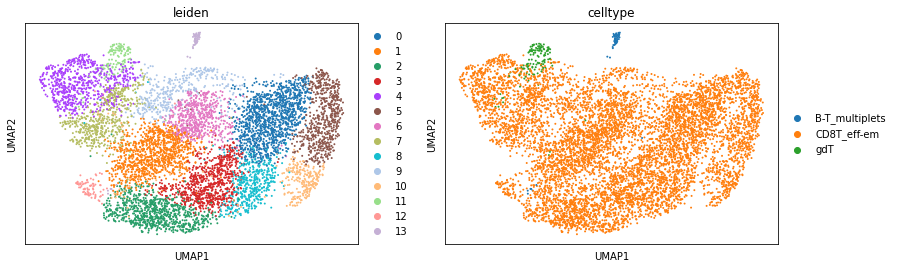

In [39]:
new_dict ={'0':'CD8T_eff-em',
'1':'CD8T_eff-em',
'2':'CD8T_eff-em',
'3':'CD8T_eff-em',
'4':'CD8T_eff-em',
'5':'CD8T_eff-em',
'6':'CD8T_eff-em',
'7':'CD8T_eff-em',
'8':'CD8T_eff-em',
'9':'CD8T_eff-em',
'10':'CD8T_eff-em',
'11':'gdT',
'12':'CD8T_eff-em',
'13':'B-T_multiplets',
}
bdata.obs['celltype'] = [new_dict[x] for x in bdata.obs['leiden']]
sc.pl.umap(bdata, color = ['leiden', 'celltype'])

In [40]:
adata.obs['celltype'] = adata.obs['celltype'].astype(str)
adata.obs['celltype'].update(bdata.obs['celltype'])

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


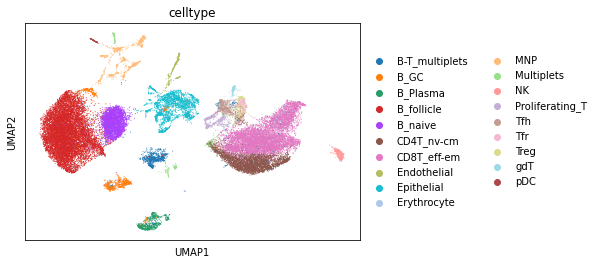

In [41]:
sc.pl.umap(adata, color = 'celltype')

## MNP

In [42]:
bdata = adata[adata.obs['celltype'].isin(['MNP', 'pDC'])].copy()
bdata

AnnData object with n_obs × n_vars = 997 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

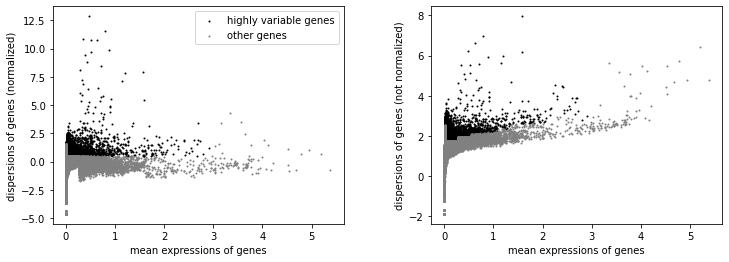

In [43]:
### recompute umap
bdata = bdata.raw.to_adata()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

In [44]:
bdata.raw = bdata

In [45]:
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 997 × 4066
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [46]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.regress_out(bdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

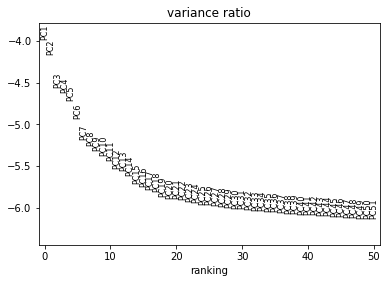

In [47]:
sc.tl.pca(bdata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=50)

In [48]:
sc.external.pp.harmony_integrate(bdata, key = 'sequencing_batch', adjusted_basis='X_pca', max_iter_harmony = 30)

2022-07-22 12:43:08,226 - harmonypy - INFO - Iteration 1 of 30
2022-07-22 12:43:08,915 - harmonypy - INFO - Iteration 2 of 30
2022-07-22 12:43:09,534 - harmonypy - INFO - Iteration 3 of 30
2022-07-22 12:43:10,133 - harmonypy - INFO - Iteration 4 of 30
2022-07-22 12:43:10,703 - harmonypy - INFO - Iteration 5 of 30
2022-07-22 12:43:10,833 - harmonypy - INFO - Iteration 6 of 30
2022-07-22 12:43:11,022 - harmonypy - INFO - Iteration 7 of 30
2022-07-22 12:43:11,216 - harmonypy - INFO - Converged after 7 iterations


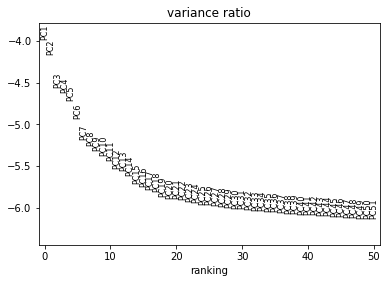

In [49]:
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=50)

In [50]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs = 30)
sc.tl.umap(bdata, min_dist=.3)

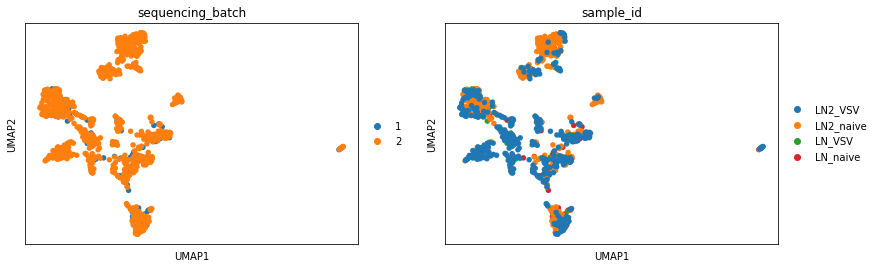

In [51]:
sc.pl.umap(bdata, color=['sequencing_batch', 'sample_id'])

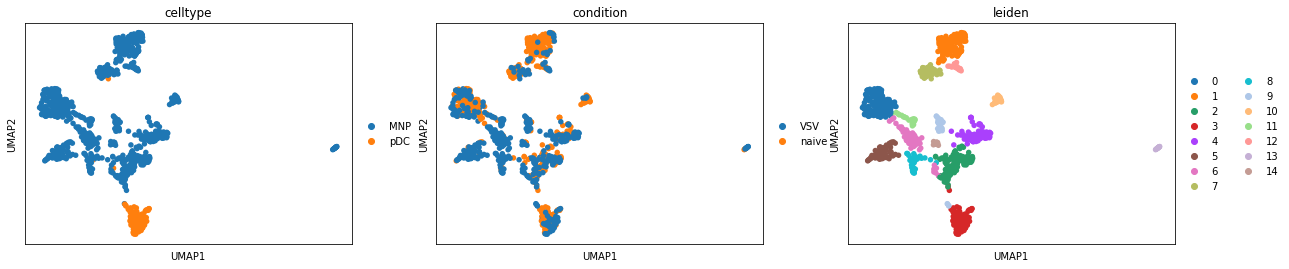

In [52]:
sc.tl.leiden(bdata)
sc.pl.umap(bdata, color=['celltype', 'condition', 'leiden'])

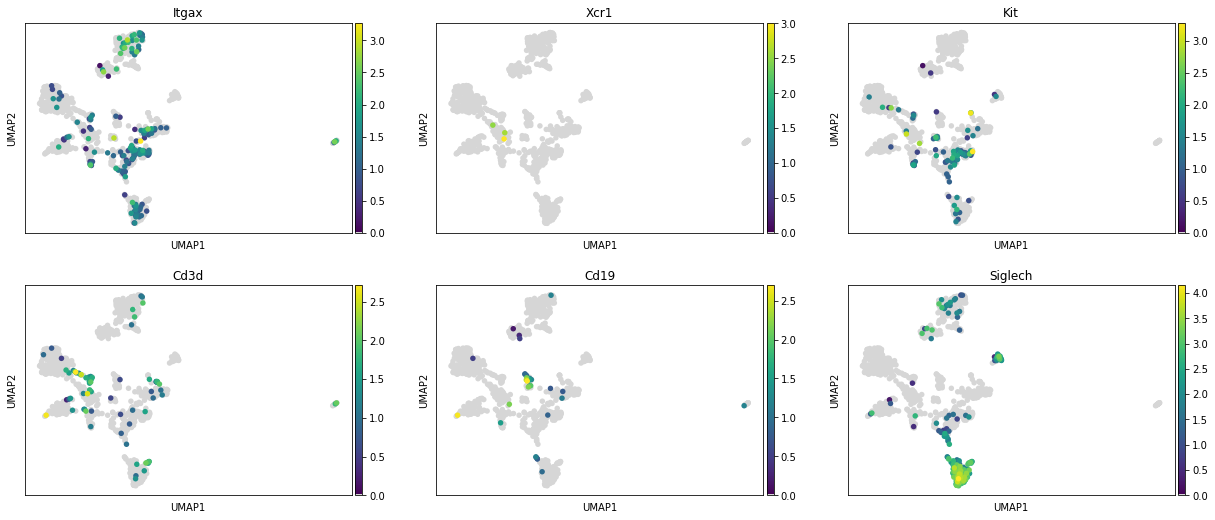

In [53]:
sc.pl.umap(bdata, color = ['Itgax', 'Xcr1', 'Kit', 'Cd3d', 'Cd19', 'Siglech'], color_map = tools.cmp(), ncols = 3)

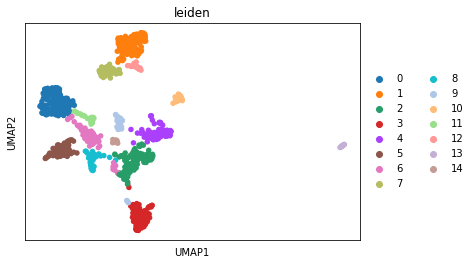

In [54]:
# sc.tl.leiden(bdata, restrict_to = ('leiden', ['2']), resolution = .5)
# sc.tl.leiden(bdata, restrict_to = ('leiden_R', ['8']), resolution = .3)
sc.pl.umap(bdata, color=['leiden'])

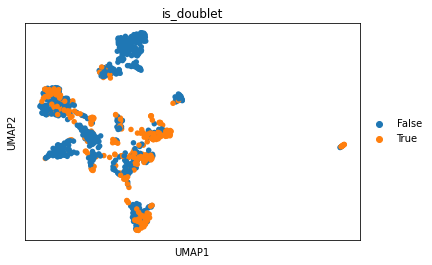

In [55]:
sc.pl.umap(bdata, color=['is_doublet'])

<AxesSubplot:xlabel='leiden'>

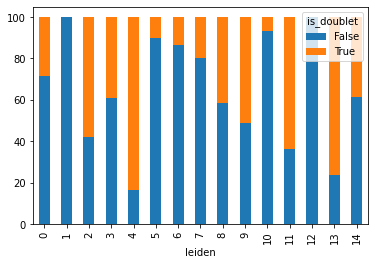

In [56]:
pd.crosstab(bdata.obs['is_doublet'], bdata.obs['leiden']).apply(lambda r: r/r.sum()*100).T.plot.bar(stacked = True)

In [57]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden', method = 'wilcoxon')

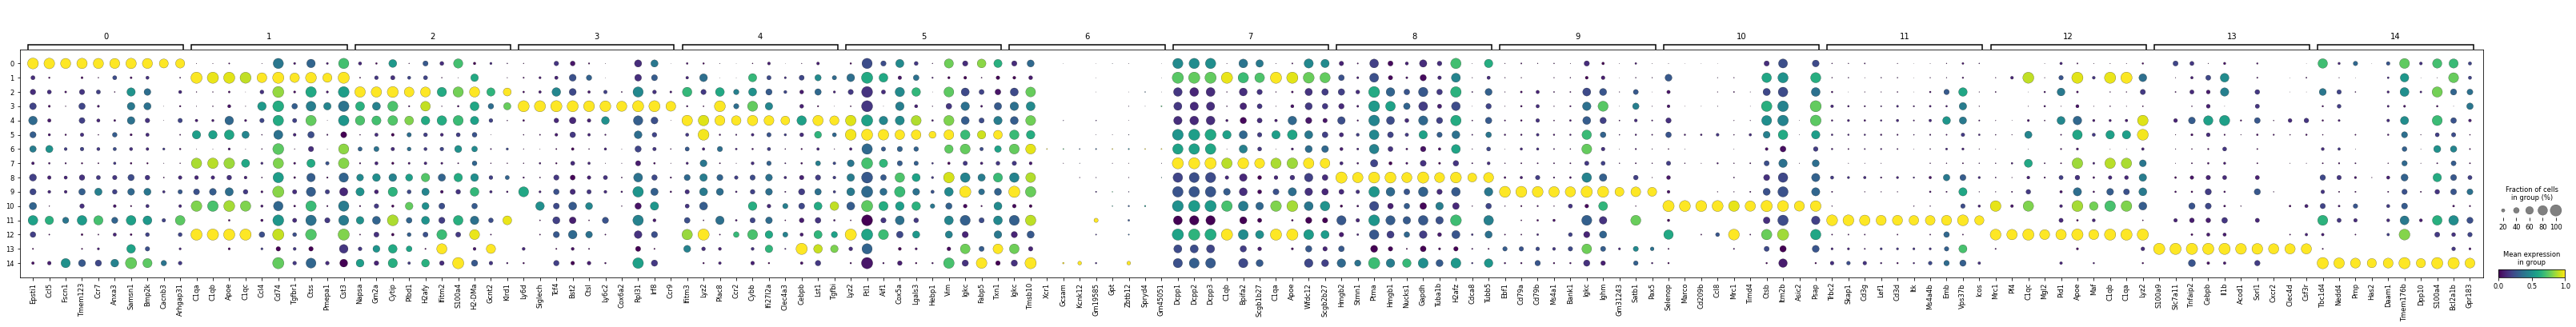

In [58]:
sc.pl.rank_genes_groups_dotplot(bdata, n_genes= 10, 
                                min_logfoldchange = 2, 
                                standard_scale = 'var', 
                                color_map = 'viridis', dendrogram = False)

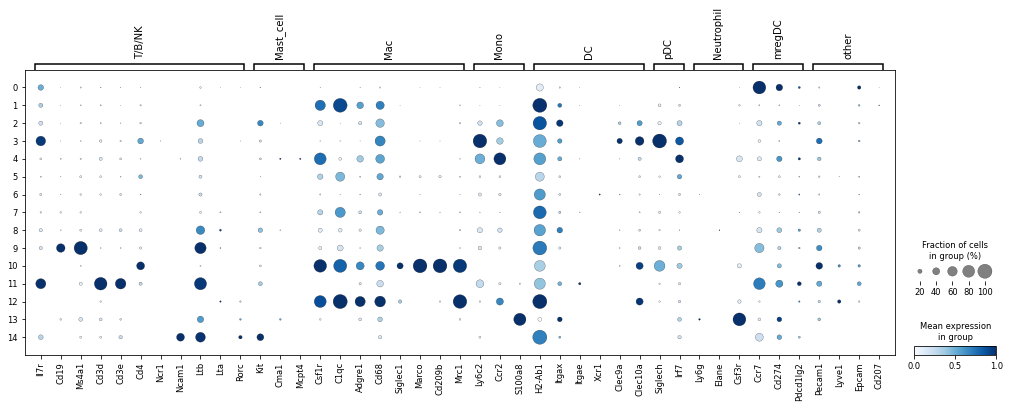

In [59]:
sc.pl.dotplot(bdata, {
    'T/B/NK':['Il7r', 'Cd19', 'Ms4a1', 'Cd3d', 'Cd3e', 'Cd4', 'Ncr1', 'Ncam1', 'Ltb', 'Lta', 'Rorc',],
    'Mast_cell':['Kit', 'Cma1', 'Mcpt4'],
    'Mac':['Csf1r', 'C1qc', 'Adgre1', 'Cd68', 'Siglec1', 'Marco', 'Cd209b', 'Mrc1'],
    'Mono':['Ly6c2', 'Ccr2', 'S100a8'],
    'DC':['H2-Ab1', 'Itgax', 'Itgae', 'Xcr1', 'Clec9a', 'Clec10a'], 
    'pDC':['Siglech', 'Irf7'],
    'Neutrophil':['Ly6g', 'Elane', 'Csf3r'],
    'mregDC':['Ccr7', 'Cd274', 'Pdcd1lg2'],
    'other':['Pecam1', 'Lyve1', 'Epcam', 'Cd207']
},
              groupby = 'leiden',
              standard_scale = 'var', 
              color_map = 'Blues',)

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


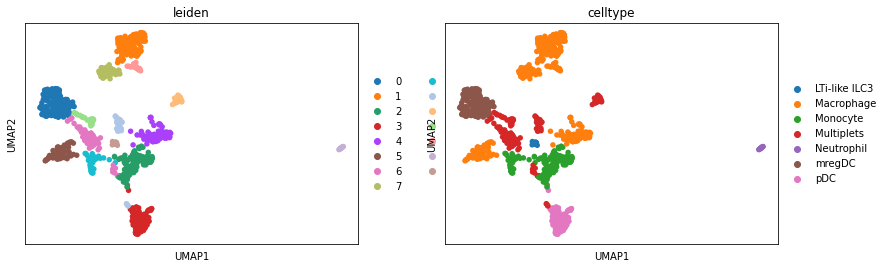

In [66]:
new_dict ={'0':'mregDC',
'1':'Macrophage',
'2':'Monocyte',
'3':'pDC',
'4':'Macrophage',
'5':'Macrophage',
'6':'Multiplets',
'7':'Macrophage',
'8':'Monocyte',
'9':'Multiplets',
'10':'Multiplets',
'11':'Multiplets',
'12':'Macrophage',
'13':'Neutrophil',
'14':'LTi-like ILC3',
}
bdata.obs['celltype'] = [new_dict[x] for x in bdata.obs['leiden']]
sc.pl.umap(bdata, color = ['leiden', 'celltype'])

In [67]:
adata.obs['celltype'] = adata.obs['celltype'].astype(str)
adata.obs['celltype'].update(bdata.obs['celltype'])

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


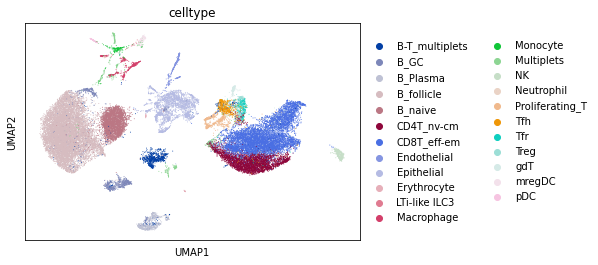

In [68]:
sc.pl.umap(adata, color = 'celltype')

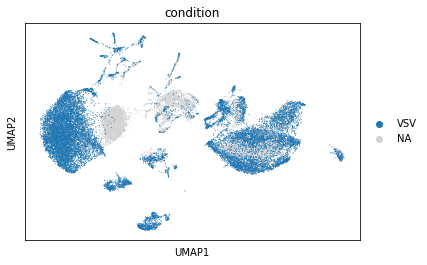

In [69]:
sc.pl.umap(adata, color = 'condition', groups = ['VSV'])

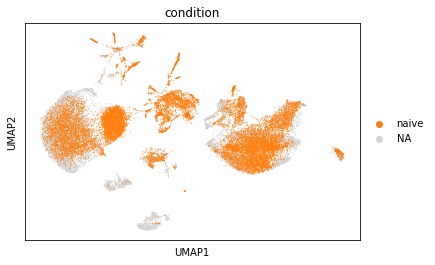

In [70]:
sc.pl.umap(adata, color = 'condition', groups = ['naive'])

In [71]:
adata.write_h5ad('h5ad/ln_integrated.h5ad', compression = 'gzip')